In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_keras import *
from keras.datasets import cifar10

In [2]:
names_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 
              3: 'cat', 4: 'deer', 5: 'dog', 
              6: 'frog', 7: 'horse', 8: 'ship', 
              9: 'truck'}
              
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()


# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [3]:
def process(X):
    X_norm = X.reshape(len(X), X[0].size).astype(float)
    X_norm -= np.mean(X)
    X_norm /= np.std(X).astype(float)
    #X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm)).astype(float)
    return X_norm

In [4]:
Xtrain_n = process(Xtrain)
Xtest_n = process(Xtest)

testdata = [Xtest_n, ytest]

print(Xtrain_n.shape, ytrain.shape)

(50000, 3072) (50000, 1)


In [5]:
reg1 = regularizers.L2(lambda_=0.01)
reg2 = regularizers.L2(lambda_=0.01)
reg3 = regularizers.L2(lambda_=0.01)

model = models2.Network()

model.add(layers2.Input(Xtrain_n.shape[1]))
model.add(layers2.Dense(3072, 100, activation=activations.sigmoid(), reg=reg1), scale=.01)
model.add(layers2.Dense(100, 10, activation=activations.linear(),reg=reg2), scale=.01)
model.printLayers()

Layer 0: <class 'my_keras.layers2.Input'>, neurons: 3072
Layer 1: <class 'my_keras.layers2.Dense'>, neurons: 100
Layer 2: <class 'my_keras.layers2.Dense'>, neurons: 10


Debugging

In [80]:
yb_pred = model.forward(Xtrain_n[0:10,:])
ytrue = ytrain[0:10]


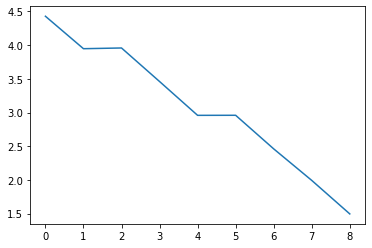

In [49]:
lossy = losses.MSE_img()
data = []
for idx in range(1, 10):
    data.append(lossy(yb_pred[0:idx], ytrue[0:idx]))
plt.plot(data)

In [77]:
from scipy import linalg
till = 2
pred = yb_pred[0:till]

metrics.MSE_i(yb_pred[0:till], ytrue[0:till])
ytrue.shape

(10, 1)

In [119]:
diff = np.copy(yb_pred)
m = diff.shape[0]
idx = np.arange(0, m)
ys = ytrue[:,0]
diff[idx, ytrue[:,0]] -= 1

np.linalg.norm(diff)**2 / (2*m)

4.445700106495329

In [96]:
lossy = losses.MSE_img()
lossy(yb_pred, ytrue)


0.9977181036427625

In [120]:
yb_pred[0]
diff[0]

array([ 0.99729174,  0.99759259,  0.99761771,  0.99764621,  0.99778361,
        0.99744966, -0.00213476,  0.96577349,  0.9973367 ,  0.97989648])

Fitting

In [6]:
loss_hist = model.fit(Xtrain_n, ytrain, loss=losses.MSE_img(), opt=optimizers.SGD(alpha=.001), 
                      metric=metrics.acc_img, testdata=testdata, epochs=20, batch_size=50)

Epoch 0, Train loss: 0.4982
 Accuracy test: 21.52
Epoch 2, Train loss: 0.4805
 Accuracy test: 27.05
Epoch 4, Train loss: 0.4707
 Accuracy test: 28.96
Epoch 6, Train loss: 0.4647
 Accuracy test: 31.14
Epoch 8, Train loss: 0.4603
 Accuracy test: 32.15
Epoch 10, Train loss: 0.4565
 Accuracy test: 32.42
Epoch 12, Train loss: 0.4532
 Accuracy test: 33.76
Epoch 14, Train loss: 0.4502
 Accuracy test: 34.06
Epoch 16, Train loss: 0.4475
 Accuracy test: 34.72
Epoch 18, Train loss: 0.4449
 Accuracy test: 35.11


4.180615453607106

In [ ]:
diff = np.copy(yb_pred)
m = yb_pred.shape[0]
idx = np.arange(0, m)
diff[idx, ytrue] -= 1

np.linalg.norm(diff)**2 / (2*m)

21.346 21.740000000000002


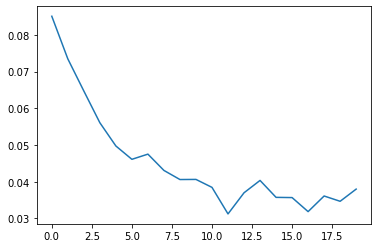

In [10]:
plt.plot(loss_hist)
print(100*metrics.acc_img(model.forward(Xtrain_n), ytrain), 
      100*metrics.acc_img(model.predict(Xtest_n), ytest))
